**Problem Statement:**

The goal of this analysis is to derive insights into air pollution trends, assess the impact of pollutants on AQI, and identify areas for intervention to improve air quality.

**Objective :**

The objective of this EDA project is to **analyze and interpret air quality data across different cities and time periods** to uncover trends, patterns, and insights. Specifically, the project aims to:

1. **Understand Pollution Levels**: Identify key pollutants and their contribution to air quality degradation.
2. **City-Wise Comparison**: Compare air quality indices and pollutant levels across cities to determine the most and least polluted regions.
3. **Temporal Patterns**: Explore temporal trends (daily, monthly, or yearly) in pollution levels and AQI to identify seasonal effects or long-term trends.
4. **Data Completeness and Quality**: Investigate missing data, outliers, and inconsistencies, and apply suitable imputation or cleaning methods.
5. **Insights for Policy**: Generate actionable insights to assist policymakers and stakeholders in implementing effective air quality management strategies.

**Description of the Dataset:**

- The `city_day.csv` dataset likely contains daily air quality measurements for various cities over a period of time. Based on its name and the problem statement, it's reasonable to assume that the data includes information about:

- **City:** The name of the city where the measurements were taken.
- **Date:** The date of the measurement.
- **Pollutants:** Concentrations of different air pollutants such as PM2.5, PM10, NO2, SO2, CO, and O3.
- **AQI:** The calculated Air Quality Index (AQI) for the day.
- **Other relevant information:** The dataset may also include other potentially relevant data like temperature, wind speed, and humidity, which can influence air quality.


# **Understanding the data**

**1. Displaying the Data:**

- df.head() and df.tail() to display the first and last 5 rows of the dataframe, respectively. This provides a quick glimpse of the data's structure and values.
- To display a specific number of rows from the top,   can modify df.head() like this: df.head(10) to display the first 10 rows.
- Similarly, to display a specific number of rows from the bottom,   can modify df.tail() like this: df.tail(10) to display the last 10 rows.

**2. Basic Information:**

- df.info() provides essential information about the dataframe, including:
    - Column names
    - Data types of each column
    - Non-null values in each column
    - Memory usage


- df.shape shows the dimensions of the dataframe (number of rows and columns).
- df.describe() gives descriptive statistics for numerical columns such as:
  - Count
  - Mean
  - Standard Deviation
  - Minimum
  - 25th Percentile
  - 50th Percentile (Median)
  - 75th Percentile
  - Maximum
- df.isnull().sum() calculates and displays the total number of missing values (nulls) in each column.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [56]:
df = pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [57]:
df.head()  # Displays the first 5 rows

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [58]:
df.tail()  # Displays the last 5 rows

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


## Basic info

In [59]:
df.info()  # Provides information about columns, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [60]:
df.shape

(29531, 16)

In [61]:
df.describe()  # Shows descriptive statistics for numerical columns

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [62]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


# Basic Data Visualization

- Doing basic visualization to check if there any skewness or not

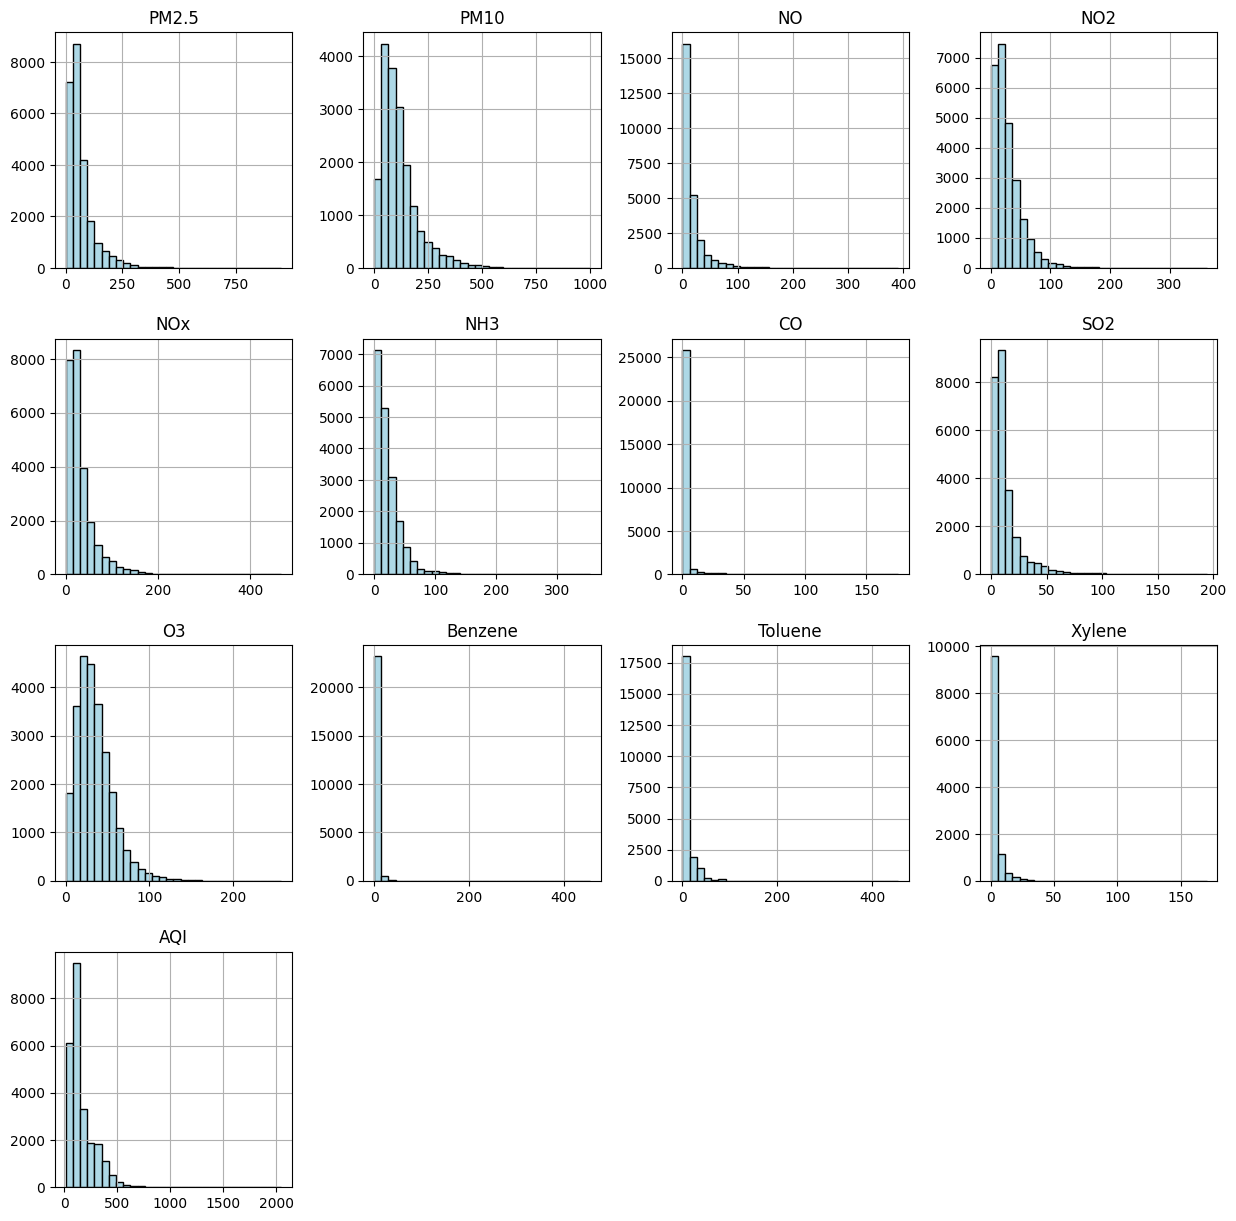

In [63]:
df.hist(color='lightblue',figsize=(15,15),bins=30,edgecolor='k')
plt.show()

# **Data Cleaning**

**Handling the 'Date' column:**

- converted the 'Date' column to datetime objects, which is crucial for time-series analysis.
- Extracted 'day', 'month', and 'year' as separate features. This can be useful for identifying seasonal trends.
- Dropped the original 'Date' column, as the relevant information is now captured in the new features.

**Handling missing values:**

- 'Xylene' column has too many null values and decided to drop it. This is a valid approach when a feature has a large proportion of missing data.
- dropped 'AQI_Bucket' as  determined it wasn't needed for  r analysis.
- For other columns with missing values,  filled them with the median. This is a reasonable imputation strategy, especially when the data has skewness, as   mentioned.

**Handling duplicates:**

  - checked for duplicate rows using df.duplicated().sum() but haven't taken any action to remove them. If duplicates exist,   might consider removing them to avoid bias in  r analysis.

**Encoding categorical features:**

  - used Label Encoding to convert the 'City' column to numerical representation. This is necessary for many machine learning algorithms that require numerical input.

**Convert 'Date' to datetime**

**Make sure the 'Date' column is in datetime format using pd.to_datetime()**:

In [64]:
df['Date'] = pd.to_datetime(df['Date'])

**Extract day, month, and year**

**Create new columns for 'day', 'month', and 'year' using the dt accessor:**

In [65]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [66]:
df.sample()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,day,month,year
18737,Jorapokhar,2020-02-20,117.17,292.12,24.13,11.44,NaN,8.88,NaN,41.98,126.98,NaN,NaN,NaN,256.0,Poor,20,2,2020


**Droping the date column**

In [67]:
df.drop('Date',axis=1,inplace=True)

**Droping the Xylene column becouse it has too many null values**

In [68]:
df.drop('Xylene',axis=1,inplace=True)

**Droping the AQI_Bucket column becouse it does not needed**

In [69]:
df.drop('AQI_Bucket',axis=1,inplace=True)

**filling null values with meadian becouse every column has skewness**

In [70]:
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].median())
df['PM10']=df['PM10'].fillna(df['PM10'].median())
df['NO']=df['NO'].fillna(df['NO'].median())
df['NOx']=df['NOx'].fillna(df['NOx'].median())
df['NH3']=df['NH3'].fillna(df['NH3'].median())
df['NO2']=df['NO2'].fillna(df['NO2'].median())
df['SO2']=df['SO2'].fillna(df['SO2'].median())
df['CO']=df['CO'].fillna(df['CO'].median())
df['O3']=df['O3'].fillna(df['O3'].median())
df['Benzene']=df['Benzene'].fillna(df['Benzene'].median())
df['Toluene']=df['Toluene'].fillna(df['Toluene'].median())
df['AQI']=df['AQI'].fillna(df['AQI'].median())


In [71]:
df.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [72]:
df.duplicated().sum()

0

In [73]:
df.sample()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,day,month,year
5589,Bengaluru,16.82,43.02,6.33,16.04,13.91,20.52,0.86,7.58,18.19,0.61,3.1,59.0,19,7,2018


In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['City'] = le.fit_transform(df['City'])

# **Corrrelation**

**Understanding Correlation**

Correlation measures the strength and direction of a linear relationship between two or more variables. It helps    understand how changes in one variable are associated with changes in another.

**Why Correlation is Important in Data Analysis**

1. Feature Selection: Correlation can help    identify redundant or highly correlated features. This is important for model building because including redundant features can lead to overfitting and reduced model performance.

2. Identifying Relationships: Correlation can reveal hidden relationships between variables. These insights can guide further investigation and help    build better models.

3. Data Cleaning: Correlation can help    detect inconsistencies or errors in   r data. For example, if two variables that should be highly correlated show a weak correlation, it might indicate a data quality issue.

In [75]:
df.corr()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,day,month,year
City,1.000000,0.062446,-0.021395,0.047182,-0.078589,0.024948,-0.182565,-0.255886,-0.101327,0.001530,0.002070,-0.062730,-0.121778,0.000181,0.018314,0.032550
PM2.5,0.062446,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.633654,-0.009835,0.041722,-0.170771
PM10,-0.021395,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.447686,-0.019463,-0.012204,-0.067119
NO,0.047182,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.438039,-0.003483,0.026233,0.009100
NO2,-0.078589,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.531952,-0.006954,0.033157,-0.041194
NOx,0.024948,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.436282,-0.006290,0.022637,-0.003627
NH3,-0.182565,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,0.097916,0.001734,0.013439,-0.116269
CO,-0.255886,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.650475,0.001251,-0.001473,-0.057421
SO2,-0.101327,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.454182,-0.002498,-0.025747,0.059695
O3,0.001530,0.166064,0.208398,0.020788,0.289435,0.089095,0.076295,0.043311,0.160489,1.000000,0.023982,0.135498,0.199100,-0.003337,-0.081535,-0.005868


<Axes: >

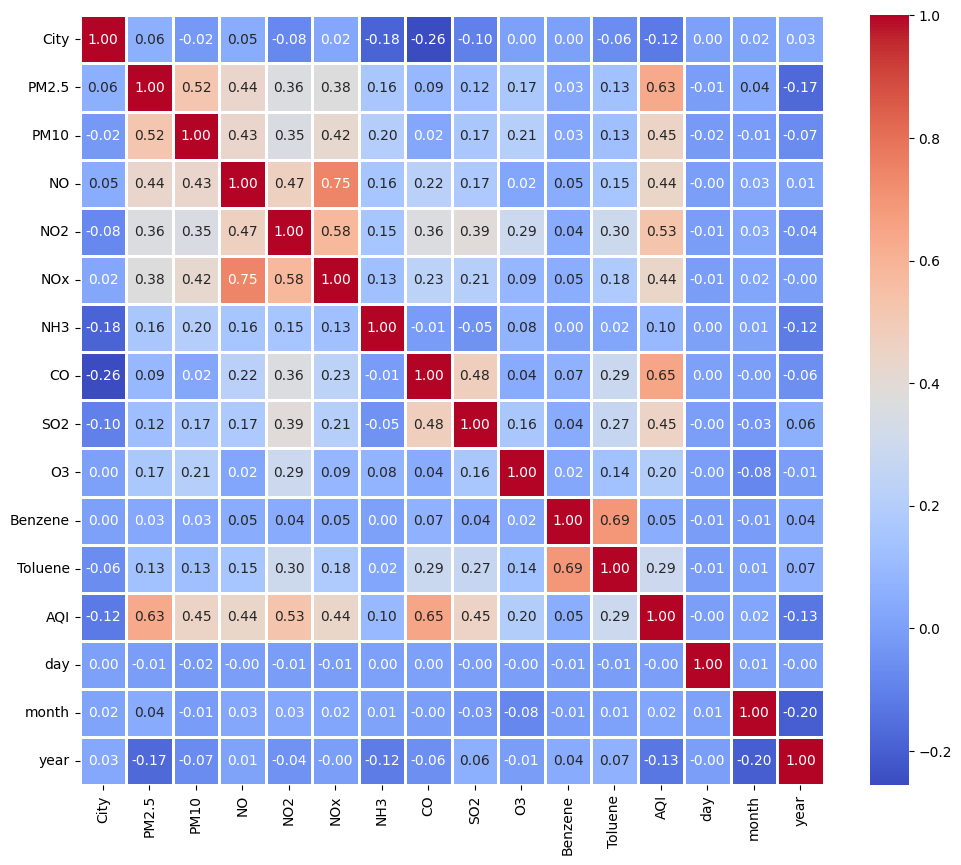

In [76]:
plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=2)

In [77]:
AQI_corr = df.corr()['AQI'].sort_values(ascending=False)

AQI_corr

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
O3,0.199100


<Axes: >

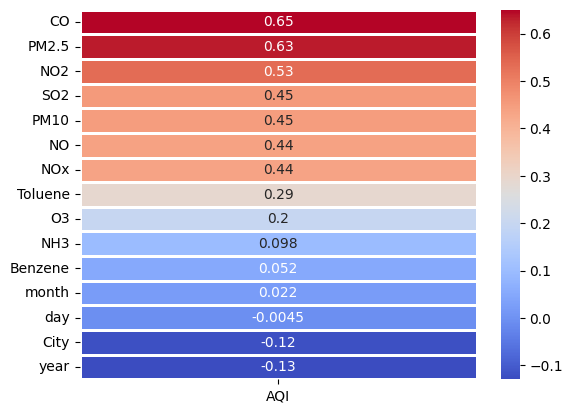

In [78]:
AQI_corr = AQI_corr.drop('AQI')  # Drop 'AQI' from the AQI_corr Series

sns.heatmap(AQI_corr.to_frame(), annot=True,  cmap='coolwarm', linewidths=2) # Convert AQI_corr to DataFrame using to_frame() for heatmap

- Taking only needed features and droping other features

- removing NO and NO2 becouse it has corerelation with NOx


In [79]:
df = df.drop(['City', 'year', 'day', 'month','Benzene','NH3','O3','Toluene','NO','NO2'], axis=1)

# **Checking Skewness**

**Understanding log1p**

- log1p is a mathematical function that calculates the natural logarithm of 1 plus the input value. It is often used to transform data that has a skewed distribution, especially when the data contains values close to zero.

**Why Use log1p**

1. Handling Zero Values: The standard logarithm function (log) is undefined for zero values. log1p addresses this issue by adding 1 to the input before taking the logarithm, ensuring that the transformation is valid for all non-negative values.

2. Reducing Skewness: log1p can effectively reduce the skewness of right-skewed data. This is because it compresses the larger values more than the smaller values, bringing the distribution closer to normality.

3. Improving Model Performance: Transforming skewed data with log1p can often improve the performance of statistical models that assume normality, such as linear regression.

In [80]:
df.sample()

,PM2.5,PM10,NOx,CO,SO2,AQI
15530,14.91,32.93,5.8,0.19,5.41,71.0


In [81]:
df['PM2.5'] = np.log1p(df['PM2.5'])

In [82]:
df['PM10'] = np.log1p(df['PM10'])

In [83]:
df['NOx'] = np.log1p(df['NOx'])

In [84]:
df['CO'] = np.log1p(df['CO'])

In [85]:
df['SO2'] = np.log1p(df['SO2'])

In [86]:
df['AQI'] = np.log1p(df['AQI'])

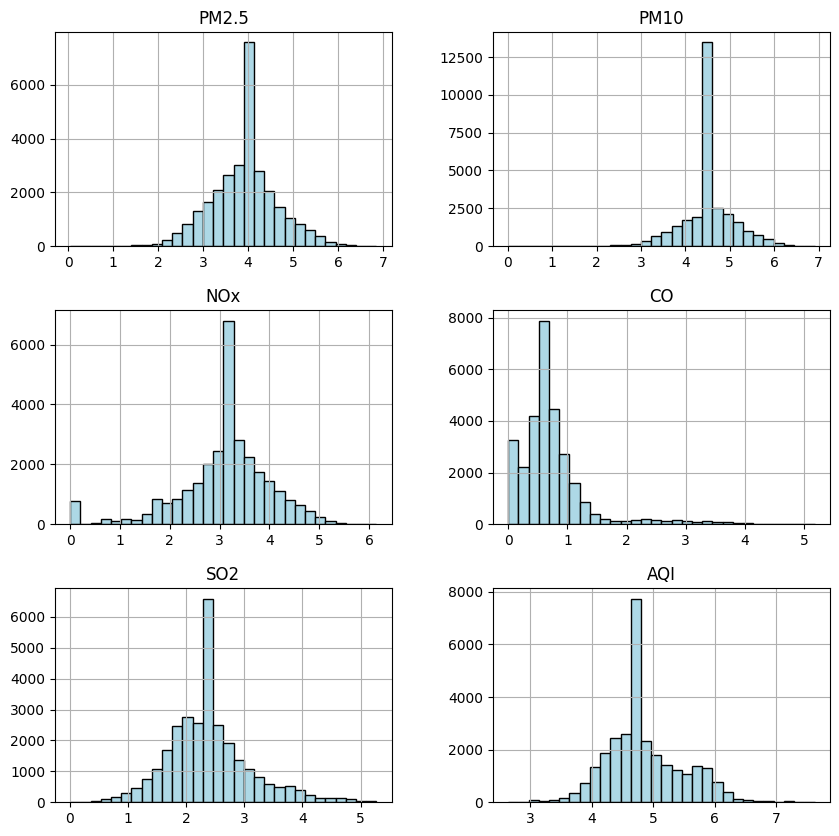

In [87]:
df.hist(color='lightblue',figsize=(10,10),bins=30,edgecolor='k')
plt.show()

In [88]:
df.shape

(29531, 6)

# **Outlier Ditaction**

**Understanding Outliers**

- Outliers are data points that deviate significantly from other observations in a dataset. They can be caused by various factors, such as measurement errors, data entry mistakes, or genuine extreme values.

**Why Outlier Detection is Important**

1. Data Quality: Outliers can distort statistical analysis and lead to inaccurate conclusions. Identifying and handling them is crucial for ensuring data quality.

2. Model Performance: Outliers can significantly impact the performance of machine learning models. Removing or treating them can improve model accuracy and robustness.

3. Insight Discovery: Outliers can sometimes represent interesting or unusual patterns in the data. Investigating them can lead to valuable insights.

**Methods for Outlier Detection**

There are several methods for detecting outliers, including:

- Box Plots: Box plots visually display the distribution of data and highlight potential outliers as points outside the whiskers.

- Z-Score: The Z-score measures how many standard deviations a data point is from the mean. Data points with a Z-score above a certain threshold (e.g., 3) are often considered outliers.

- Interquartile Range (IQR): The IQR is the difference between the 75th and 25th percentiles of the data. Data points outside a certain range (e.g., 1.5 times the IQR below the 25th percentile or above the 75th percentile) are considered outliers.

**Handling Outliers**

Once    have identified outliers,    need to decide how to handle them. Common approaches include:

- Removing Outliers: This is a straightforward approach but can lead to data loss.

<Axes: >

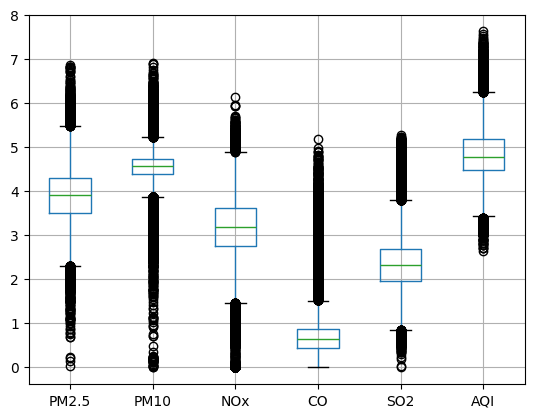

In [89]:
df.boxplot()

In [90]:
df.sample()

,PM2.5,PM10,NOx,CO,SO2,AQI
19003,2.380472,3.016025,4.404766,0.887891,2.742774,4.615121


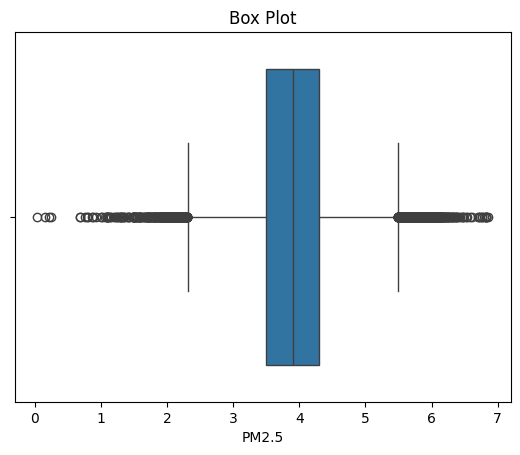

Number of outliers in PM2.5: 155


In [91]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['PM2.5'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['PM2.5']))
outliers2 = df[z_scores > 3]
print(f'Number of outliers in PM2.5: {outliers2.shape[0]}')

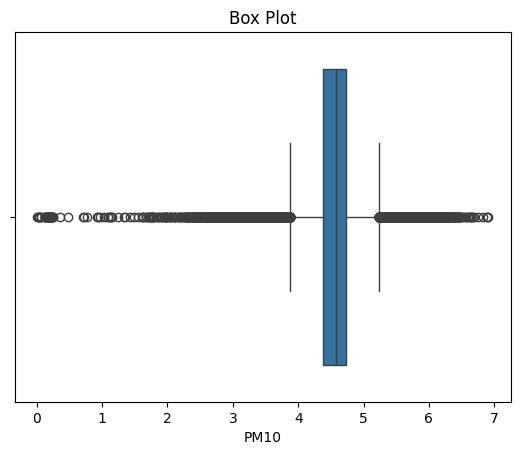

Number of outliers in PM10	: 274


In [92]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['PM10'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['PM10']))
outliers2 = df[z_scores > 3]
print(f'Number of outliers in PM10	: {outliers2.shape[0]}')

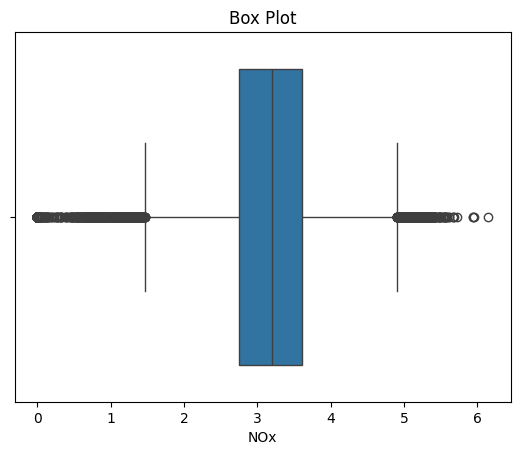

Number of outliers in NOx: 791


In [93]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['NOx'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['NOx']))
outliers2 = df[z_scores > 3]
print(f'Number of outliers in NOx: {outliers2.shape[0]}')

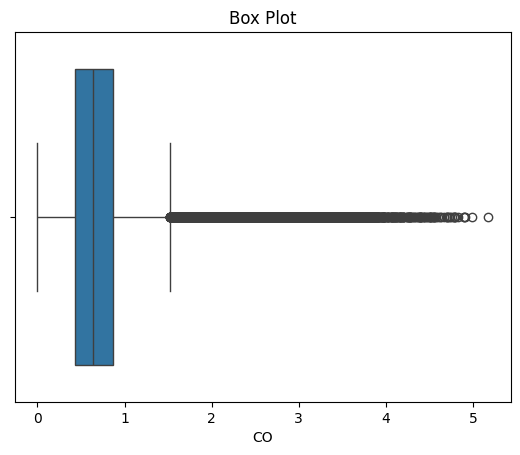

Number of outliers in CO: 904


In [94]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['CO'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['CO']))
outliers2 = df[z_scores > 3]
print(f'Number of outliers in CO: {outliers2.shape[0]}')

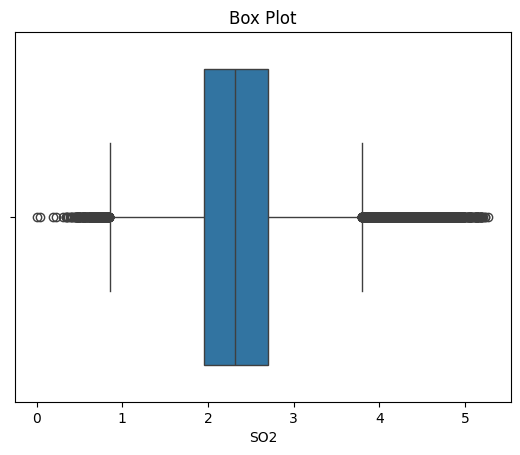

Number of outliers in SO2: 365


In [95]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['SO2'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['SO2']))
outliers2 = df[z_scores > 3]
print(f'Number of outliers in SO2: {outliers2.shape[0]}')

In [96]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df):
    for col in df.columns:
        # Skip the specified column

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df)
df_cleaned

,PM2.5,PM10,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.859913,0.678034,3.240637,4.779123
3,3.903386,4.571407,2.942859,0.993252,2.975019,4.779123
14,3.903386,4.571407,2.867899,0.470004,3.397524,4.779123
56,3.903386,4.571407,3.199489,0.636577,2.318458,4.779123
...,...,...,...,...,...,...
29523,3.565581,4.520701,2.647592,0.444686,2.478218,4.465908
29524,2.670694,4.086648,2.645465,0.343590,2.218116,4.356709
29527,3.233961,4.318687,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,2.961658,0.392042,2.242835,4.234107


In [97]:
df_cleaned=df

# **Scaled Data Prediction standard()**

**Understanding the Issue**

- When    scale   r data using StandardScaler,    fit the scaler on   r training data to learn the mean and standard deviation of each feature.    then use this fitted scaler to transform both   r training and testing data.

- However, when    want to make predictions on new, unseen data,    need to apply the same scaling that was used during training. If    don't,   r predictions will be incorrect because the model was trained on scaled data and expects the input data to be scaled in the same way.

**Solution: Using transform() on New Data**

- The key is to use the transform() method of the fitted StandardScaler object to scale the new data before making predictions. Here's how    would typically do it:

- fit_transform() is used on the training data to learn the scaling parameters (mean and standard deviation) and apply the scaling.

In [98]:
df.sample()


,PM2.5,PM10,NOx,CO,SO2,AQI
5622,3.073156,4.363735,3.414443,0.57098,1.938742,4.248495


In [99]:
df2=df #making df2 for standardscalar()

In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming   r DataFrame is called 'df'
# Select the features    want to scale
features = ['PM2.5','PM10','NOx','CO','SO2']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to   r data and transform it
scaled_data = scaler.fit_transform(df[features])

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

#    can now use 'scaled_df' for further analysis or modeling

In [101]:
x=df2[['PM2.5','PM10','NOx','CO','SO2']]
y=df['AQI']

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
model = LinearRegression()

In [104]:
model.fit(x_train,y_train)

LinearRegression()

In [105]:
y_pred=model.predict(x_test)
y_pred

array([4.61160822, 4.61160822, 4.92580384, ..., 4.89387187, 4.45220613,
       4.82999657])

In [106]:
# model eveution

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)



print('Mean Squared Error:',mse) #it should be around 0
print('R-squared score :',r2)    #it should be around 1

Mean Squared Error: 0.08077223599504003
R-squared score : 0.776649177497484


# **Documantation and Reporting**

In [110]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with price': df.corr()['AQI'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling
final_df = df[['PM2.5','PM10','NOx','CO','SO2','AQI']]
final_df

EDA Summary:
Dataset Shape: (29531, 6)
Missing Values: 0
Correlation with price: AQI      1.000000
PM2.5    0.791353
PM10     0.630454
CO       0.542678
NOx      0.405340
SO2      0.401969
Name: AQI, dtype: float64


,PM2.5,PM10,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.859913,0.678034,3.240637,4.779123
2,3.903386,4.571407,3.424263,2.912351,3.403528,4.779123
3,3.903386,4.571407,2.942859,0.993252,2.975019,4.779123
4,3.903386,4.571407,3.657389,3.139833,3.697096,4.779123
...,...,...,...,...,...,...
29526,2.773838,3.950089,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,2.961658,0.392042,2.242835,4.234107
29529,2.870169,3.931237,2.985682,0.418710,2.383243,4.007333


# Prediction

**Input Gathering:**

- The code first prompts the user to enter values for five different air pollutants: PM2.5, PM10, NOx, CO, and SO2.
- float(input(...)) is used to ensure that the input values are treated as numerical (floating-point) values.

**Creating Input for Prediction:**

- The collected input values are then organized into a list of lists called user_input. This is done because the predict() method of many machine learning models expects a 2D array-like input, representing multiple data points (even if you're predicting for just one).

**Making the Prediction:**

- AQI = model.predict(user_input) uses a pre-trained machine learning model (presumably named model) to predict the AQI (Air Quality Index) based on the provided pollutant values. This assumes that the model has already been trained on relevant data and is ready to make predictions.

**Displaying the Result:**

 - Finally, print('Predicated sales :', AQI) prints the predicted AQI value to the console. Note that the output message says "Predicated sales," which seems like a typo and should probably be "Predicted AQI."

In [107]:
df.sample()

,PM2.5,PM10,NOx,CO,SO2,AQI
532,3.903386,4.571407,3.199489,0.636577,2.318458,4.779123


In [108]:
PM25 = float(input('Enter PM2.5:'))
PM10 = float(input('Enter PM10 :'))
NOx = float(input('Enter NOx :'))
CO = float(input('Enter CO:'))
SO2 = float(input('Enter SO2 :'))

user_input =[[PM25,PM10,NOx,CO,SO2]]

AQI = model.predict(user_input)

print('Predicated sales :',AQI)